# A1

In [17]:
#Rohit Praveen Nair

In [9]:
import pandas as pd
file_path = "Lab Session Data.xlsx"
df = pd.read_excel(file_path)
df_cleaned = df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]
print(df_cleaned)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [26]:
# Segregate Matrices A and C 
A = df_cleaned.iloc[:, 1:-1].values
C = df_cleaned.iloc[:, -1].values
# Compute required values
dimensionality = A.shape[1]
num_vectors = A.shape[0]
rank_A = np.linalg.matrix_rank(A)
A_pinv = np.linalg.pinv(A)
X = np.dot(A_pinv, C)

print("Dimensionality of the vector space: ",dimensionality)
print("Number of vectors in the vector space: ",num_vectors)
print("Rank of Matrix A: {rank_A}")
print("Cost of each product (solution vector X): ")
print(X)


Dimensionality of the vector space:  3
Number of vectors in the vector space:  10
Rank of Matrix A: {rank_A}
Cost of each product (solution vector X): 
[ 1. 55. 18.]


# A2

In [32]:
# Calculate model vector X (cost per unit of each product)
X = np.dot(A_pinv, C)

print("\nCost per unit of each product (solution vector X):")
print("Candies: Rs. ", X[0], "per unit")
print("Mangoes: Rs. ",X[1]," per Kg")
print("Milk Packets: Rs. ",X[2],"per packet")


Cost per unit of each product (solution vector X):
Candies: Rs.  1.0000000000000027 per unit
Mangoes: Rs.  55.0  per Kg
Milk Packets: Rs.  17.99999999999999 per packet


# A3

In [11]:
import numpy as np
import pandas as pd
file_path = "Lab Session Data.xlsx"
df = pd.read_excel(file_path)
df_cleaned = df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].copy()
df_cleaned["Category"] = np.where(df_cleaned["Payment (Rs)"] > 200, "RICH", "POOR")
print(df_cleaned[["Customer", "Category"]])

  Customer Category
0      C_1     RICH
1      C_2     RICH
2      C_3     RICH
3      C_4     POOR
4      C_5     RICH
5      C_6     POOR
6      C_7     RICH
7      C_8     RICH
8      C_9     POOR
9     C_10     POOR


# A4


Stock Analysis:
Mean Price: ₹1560.66
Price Variance: 58732.37
Wednesday Mean: ₹1550.71
April Mean: ₹1698.95
Loss Probability: 49.80%
Wednesday Profit Probability: 8.43%
Mean Population Price: ₹1560.66
Probability of Making a Loss: 49.80%
Probability of Making Profit on Wednesday: 8.43%
Probability of Making Profit Given It Is Wednesday: 42.00%


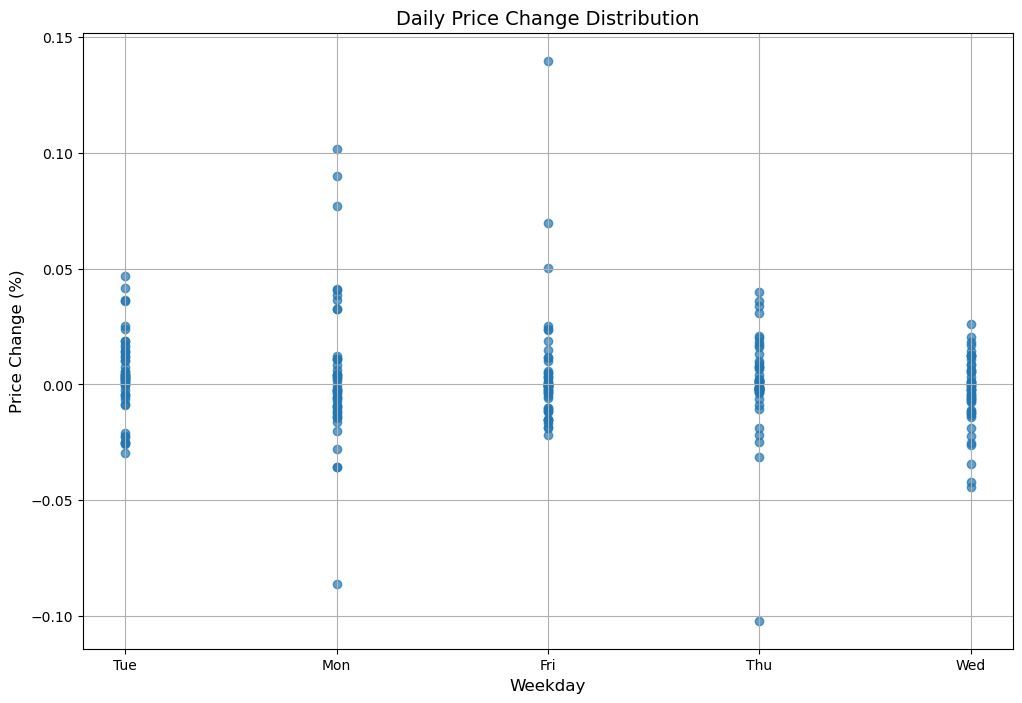

In [6]:
import statistics
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
file_path = "Lab Session Data.xlsx"
stock_df = pd.read_excel(file_path, sheet_name="IRCTC Stock Price")

# Stock price calculations
prices = stock_df.iloc[:, 3]
wed_prices = stock_df[stock_df.iloc[:, 2] == "Wed"].iloc[:, 3]
apr_prices = stock_df[stock_df.iloc[:, 1] == "Apr"].iloc[:, 3]

# Probability calculations
chg = stock_df.iloc[:, 8]
loss_prob = (chg < 0).mean()
wed_days = (stock_df.iloc[:, 2] == "Wed")
profit_wed = ((chg > 0) & wed_days).mean() if wed_days.any() else None

# Print stock analysis
print("\nStock Analysis:")
print(f"Mean Price: ₹{statistics.mean(prices):.2f}")
print(f"Price Variance: {statistics.variance(prices):.2f}")
print(f"Wednesday Mean: ₹{wed_prices.mean():.2f}" if not wed_prices.empty else "No Wednesday data")
print(f"April Mean: ₹{apr_prices.mean():.2f}" if not apr_prices.empty else "No April data")
print(f"Loss Probability: {loss_prob:.2%}")
print(f"Wednesday Profit Probability: {profit_wed:.2%}" if profit_wed else "No Wednesday data")

# Additional calculations
population_mean = statistics.mean(prices)
print(f"Mean Population Price: ₹{population_mean:.2f}")

chg_loss = stock_df[chg < 0]
print(f"Probability of Making a Loss: {len(chg_loss) / len(chg):.2%}")

profit_on_wed = stock_df[(stock_df.iloc[:, 2] == "Wed") & (stock_df.iloc[:, 8] > 0)]
print(f"Probability of Making Profit on Wednesday: {len(profit_on_wed) / len(chg):.2%}")

num_wed = len(stock_df[stock_df.iloc[:, 2] == "Wed"])
print(f"Probability of Making Profit Given It Is Wednesday: {len(profit_on_wed) / num_wed:.2%}")

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(stock_df.iloc[:, 2], chg, alpha=0.7)
plt.title("Daily Price Change Distribution", fontsize=14)
plt.xlabel("Weekday", fontsize=12)
plt.ylabel("Price Change (%)", fontsize=12)
plt.grid(True)
plt.show()

# A5-A10

=== Data Exploration ===
Data Types:
Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                        

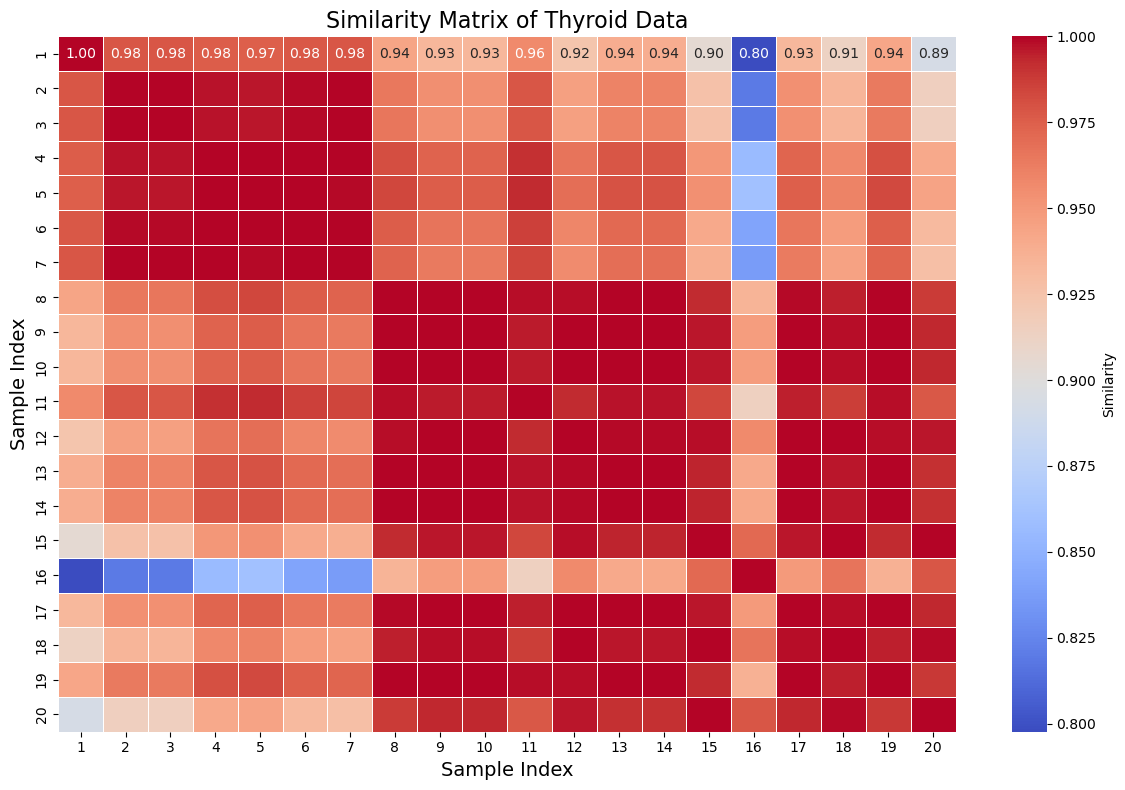

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# Load the dataset
file_path = "Lab Session Data.xlsx"
thyroid_data = pd.read_excel(file_path, sheet_name="thyroid0387_UCI")

# Data Exploration
print("=== Data Exploration ===")
print("Data Types:")
print(thyroid_data.dtypes)

# Identify categorical and numeric columns
categorical_cols = thyroid_data.select_dtypes(exclude=[np.number]).columns
numeric_cols = thyroid_data.select_dtypes(include=[np.number]).columns

print("\nCategorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

# Study data range for numeric variables
print("\nData Range for Numeric Variables:")
print(thyroid_data[numeric_cols].describe())

# Check for missing values
print("\nMissing Values:")
print(thyroid_data.isnull().sum())

# Check for outliers in numeric variables
print("\nOutliers in Numeric Variables (using Z-score > 3):")
for col in numeric_cols:
    z_scores = (thyroid_data[col] - thyroid_data[col].mean()) / thyroid_data[col].std()
    outliers = thyroid_data[z_scores.abs() > 3]
    print(f"{col}: {len(outliers)} outliers")

# Data Imputation
print("\n=== Data Imputation ===")
for col in numeric_cols:
    if (thyroid_data[col] - thyroid_data[col].mean()).abs().gt(3 * thyroid_data[col].std()).any():
        thyroid_data[col].fillna(thyroid_data[col].median(), inplace=True)
    else:
        thyroid_data[col].fillna(thyroid_data[col].mean(), inplace=True)

for col in categorical_cols:
    thyroid_data[col].fillna(thyroid_data[col].mode()[0], inplace=True)

print("Missing Values After Imputation:")
print(thyroid_data.isnull().sum())

# Data Normalization / Scaling
print("\n=== Data Normalization ===")
scaler = MinMaxScaler()
thyroid_data[numeric_cols] = scaler.fit_transform(thyroid_data[numeric_cols])
print("Normalized Data:")
print(thyroid_data.head())

# Similarity Measures
print("\n=== Similarity Measures ===")
vec1 = thyroid_data.iloc[0, :].astype(bool)
vec2 = thyroid_data.iloc[1, :].astype(bool)

f11 = sum(vec1 & vec2)
f00 = sum(~vec1 & ~vec2)
f01 = sum(~vec1 & vec2)
f10 = sum(vec1 & ~vec2)

JC = f11 / (f01 + f10 + f11)
SMC = (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient (JC):", JC)
print("Simple Matching Coefficient (SMC):", SMC)

# Cosine Similarity
vec1_full = thyroid_data.loc[0, numeric_cols].values.astype(np.float64)
vec2_full = thyroid_data.loc[1, numeric_cols].values.astype(np.float64)

cosine_sim = np.dot(vec1_full, vec2_full) / (np.linalg.norm(vec1_full) * np.linalg.norm(vec2_full))
print("Cosine Similarity:", cosine_sim)

# Heatmap Plot for Similarity Matrix
print("\n=== Heatmap Plot ===")
sim_matrix = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        v1 = thyroid_data.iloc[i, :].astype(bool)
        v2 = thyroid_data.iloc[j, :].astype(bool)
        f11 = sum(v1 & v2)
        f00 = sum(~v1 & ~v2)
        f01 = sum(~v1 & v2)
        f10 = sum(v1 & ~v2)
        JC = f11 / (f01 + f10 + f11)
        SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
        cosine_sim = np.dot(thyroid_data.loc[i, numeric_cols].values.astype(np.float64), thyroid_data.loc[j, numeric_cols].values.astype(np.float64)) / \
                     (np.linalg.norm(thyroid_data.loc[i, numeric_cols].values.astype(np.float64)) * np.linalg.norm(thyroid_data.loc[j, numeric_cols].values.astype(np.float64)))
        sim_matrix[i, j] = (JC + SMC + cosine_sim) / 3

plt.figure(figsize=(12, 8))
sns.heatmap(sim_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Similarity'},
            xticklabels=range(1, 21), yticklabels=range(1, 21), linewidths=0.5)

plt.title('Similarity Matrix of Thyroid Data', fontsize=16)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Sample Index', fontsize=14)

plt.tight_layout()
plt.show()